## Production Model and Insights

### Contents:
- [Data Import](#Data-Import)
- [Select and scale features that are effective predictors](#Select-and-scale-features-that-are-effective-predictors)
- [Preprocessing Selected features](#Preprocessing-Selected-features)
- [Fitting the Production Model](#Fitting-the-Production-Model)
- [Implementing Production Model](#Implementing-Production-Model)
- [Insights, findings and recommendations](#Insights,-findings-and-recommendations)
- [Limitations](#Limitations)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Import

In [2]:
train_set = pd.read_csv('../datasets/train_set.csv')
test_set = pd.read_csv('../datasets/test_set.csv')

## Select and scale features that are effective predictors

In [3]:
X = train_set.drop(columns=['Unnamed: 0','Id','PID','House Style', 'Overall Cond', 'Year Built', 'Exter Cond',
       'BsmtFin Type 1', 'BsmtFin SF 1', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Garage Cond', 'Enclosed Porch', 'Pool Area', 'Yr Sold',
       'mszoning_RM', 'Neighborhood_rank', 'bldgtype_Duplex',
       'roof_matl_other', 'exterior1_CemntBd', 'exterior1_MetalSd',
       'exterior2_HdBoard', 'exterior2_MetalSd', 'exterior2_Plywood',
       'vnr_other', 'foundation_CBlock', 'elect_SBrkr', 'garage_type_no',
       'garrage_finish_NA', 'garrage_finish_Unf', 'qual_neighbor','SalePrice'])
# Remaining features at least effective features in predicting price

y = train_set['SalePrice']

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Split the input data to train and test

In [6]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
# scaling the features

## Fitting the Production Model

In [7]:
from sklearn.linear_model import RidgeCV, LassoCV

In [8]:
ridge_model = RidgeCV(np.logspace(0, 5, 200), cv = 10)
lasso_model = LassoCV(n_alphas = 500)
# instantiate ridge and lasso regression

In [9]:
ridge_model.fit(X_train_ss, y_train)
lasso_model.fit(X_train_ss, y_train)
# fitting the model

LassoCV(n_alphas=500)

## Implementing Production Model

In [10]:
X_sample = test_set.drop(columns=['Unnamed: 0','Id','PID','House Style', 'Overall Cond', 'Year Built', 'Exter Cond',
       'BsmtFin Type 1', 'BsmtFin SF 1', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Garage Cond', 'Enclosed Porch', 'Pool Area', 'Yr Sold',
       'mszoning_RM', 'Neighborhood_rank', 'bldgtype_Duplex',
       'roof_matl_other', 'exterior1_CemntBd', 'exterior1_MetalSd',
       'exterior2_HdBoard', 'exterior2_MetalSd', 'exterior2_Plywood',
       'vnr_other', 'foundation_CBlock', 'elect_SBrkr', 'garage_type_no',
       'garrage_finish_NA', 'garrage_finish_Unf', 'qual_neighbor'])
# Remaining features at least effective features in predicting price

In [11]:
X_sample_ss = ss.transform(X_sample)
# scaling the features

In [12]:
ridge_pred_sample = ridge_model.predict(X_sample_ss)
lasso_pred_sample = lasso_model.predict(X_sample_ss)
# implementing models

In [13]:
test_set['SalePrice_Ridge'] = ridge_pred_sample
test_set['SalePrice_Lasso'] = lasso_pred_sample

In [14]:
test_set.head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,House Style,Overall Qual,Overall Cond,Year Built,...,sale_type_WD,sale_type_other,Liv Area_bsmt sf,qual_neighbor,Liv Area_qual,bsmt sf_neighbor,Liv Area_neighbor,bsmt sf_qual,SalePrice_Ridge,SalePrice_Lasso
0,0,2658,902301120,190,69.000000,9142,2,6,8,1910,...,1,0,1966560,24,11568,4080,7712,6120,112396.759690,115480.651392
1,1,2718,905108090,90,69.375137,9662,1,5,4,1977,...,1,0,3869089,45,9835,17703,17703,9835,149521.746236,150208.792568
2,2,2414,528218130,60,58.000000,17104,2,7,10,2006,...,0,0,978384,112,10472,10464,23936,4578,227596.000090,227025.016824
3,3,1989,902207150,30,60.000000,8520,1,5,6,1923,...,1,0,937024,20,4840,3872,3872,4840,101851.326295,102969.039483
4,4,625,535105100,20,68.060835,9500,1,6,7,1963,...,1,0,1943236,72,8364,16728,16728,8364,177335.311377,177488.294863


In [15]:
submission_ridge = test_set[['Id','SalePrice_Ridge']]
submission_ridge.rename(columns={'SalePrice_Ridge' : 'SalePrice'}, inplace = True)
submission_ridge.to_csv('../datasets/submission_ridge.csv', index = False)
# Saving data into submission_ridge.csv

C:\Users\jiana\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
submission_lasso = test_set[['Id','SalePrice_Lasso']]
submission_lasso.rename(columns={'SalePrice_Lasso' : 'SalePrice'}, inplace = True)
submission_lasso.to_csv('../datasets/submission_lasso.csv', index = False)
# Saving data into submission_lasso.csv

## Insights, findings and recommendations

In [17]:
abs(train_set.drop(columns=['Unnamed: 0','Id','PID','House Style', 'Overall Cond', 'Year Built', 'Exter Cond',
       'BsmtFin Type 1', 'BsmtFin SF 1', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Garage Cond', 'Enclosed Porch', 'Pool Area', 'Yr Sold',
       'mszoning_RM', 'Neighborhood_rank', 'bldgtype_Duplex',
       'roof_matl_other', 'exterior1_CemntBd', 'exterior1_MetalSd',
       'exterior2_HdBoard', 'exterior2_MetalSd', 'exterior2_Plywood',
       'vnr_other', 'foundation_CBlock', 'elect_SBrkr', 'garage_type_no',
       'garrage_finish_NA', 'garrage_finish_Unf', 'qual_neighbor']).corr()['SalePrice']).sort_values(ascending = False)[1:20]
# Features with highest correlation to sales price in absolute value

Liv Area_qual        0.872916
Liv Area_neighbor    0.855079
bsmt sf_qual         0.830457
Liv Area_bsmt sf     0.821892
bsmt sf_neighbor     0.821573
Overall Qual         0.804410
Exter Qual           0.715866
Kitchen Qual         0.694008
Total Bsmt SF        0.667955
Garage Area          0.655399
Garage Cars          0.648670
Bsmt Qual            0.618223
Year Remod/Add       0.550780
Full Bath            0.537682
foundation_PConc     0.530402
Mas Vnr Area         0.511849
TotRms AbvGrd        0.509194
Fireplaces           0.473137
Heating QC           0.459751
Name: SalePrice, dtype: float64

In [18]:
abs(pd.DataFrame(lasso_model.coef_,index=X_test.columns).rename(
    columns={0:'Coefficients'})).sort_values(by='Coefficients',ascending = False)[0:10]
# Features with the highest coefficients in absolute value

,Coefficients
bsmt sf_qual,31831.071643
Liv Area_qual,29291.207631
Total Bsmt SF,15481.259340
Overall Qual,9026.601533
Bsmt Unf SF,8040.275624
Liv Area_bsmt sf,7999.014900
Lot Area,6804.573712
sale_type_New,6767.370142
Liv Area_neighbor,6132.203478
bsmt sf_neighbor,5977.583515


Testing 6 essential features to determining a property value

In [19]:
def to_test_increase(test_factor):
    
    for i in test_factor:
        
        factor_test = pd.read_csv('../datasets/factor_test.csv')
        test_set = pd.read_csv('../datasets/test_set.csv')
        factor_test[i] = factor_test[i] + 1 # increment of 1 unit for given factor
        
        factor_test['Liv Area_bsmt sf'] = factor_test['Gr Liv Area'] * factor_test['Total Bsmt SF']
        factor_test['qual_neighbor'] = factor_test['Overall Qual'] * factor_test['Neighborhood_rank']
        factor_test['Liv Area_qual'] = factor_test['Gr Liv Area'] * factor_test['Overall Qual']
        factor_test['bsmt sf_neighbor'] = factor_test['Total Bsmt SF'] * factor_test['Neighborhood_rank']
        factor_test['Liv Area_neighbor'] = factor_test['Gr Liv Area'] * factor_test['Neighborhood_rank']
        factor_test['bsmt sf_qual'] = factor_test['Total Bsmt SF'] * factor_test['Overall Qual']
        # feature engineering
        
        X_factor = factor_test.drop(columns = ['Unnamed: 0','Id','PID','House Style', 'Overall Cond', 'Year Built', 'Exter Cond',
       'BsmtFin Type 1', 'BsmtFin SF 1', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Garage Cond', 'Enclosed Porch', 'Pool Area', 'Yr Sold',
       'mszoning_RM', 'Neighborhood_rank', 'bldgtype_Duplex',
       'roof_matl_other', 'exterior1_CemntBd', 'exterior1_MetalSd',
       'exterior2_HdBoard', 'exterior2_MetalSd', 'exterior2_Plywood',
       'vnr_other', 'foundation_CBlock', 'elect_SBrkr', 'garage_type_no',
       'garrage_finish_NA', 'garrage_finish_Unf', 'qual_neighbor'])
        # drop columns with 0 coef in Lasso model
        
        X_factor_ss = ss.transform(X_factor)
        y_factor = ridge_model.predict(X_factor_ss)
        ridge_pred = ridge_model.predict(X_sample_ss)
        # Predicting the model with change in feature
        
        print(f'- 1 unit change in {i} leads to approximately {np.mean(y_factor - ridge_pred)} change in SalePrice')
    
to_test_increase(['Overall Qual', 'Exter Qual','Kitchen Qual','Total Bsmt SF', 'Gr Liv Area', 'Garage Area'])

- 1 unit change in Overall Qual leads to approximately 10820.978792853928 change in SalePrice
- 1 unit change in Exter Qual leads to approximately 4685.020657317706 change in SalePrice
- 1 unit change in Kitchen Qual leads to approximately 6698.188331313283 change in SalePrice
- 1 unit change in Total Bsmt SF leads to approximately 28.325894480552776 change in SalePrice
- 1 unit change in Gr Liv Area leads to approximately 49.308528164149735 change in SalePrice
- 1 unit change in Garage Area leads to approximately 12.805701398084716 change in SalePrice


## Findings and recommendations for selected features
* Overall Quality
* Exterial Quality
* Kitchen Quality
* Total Basement Square Feet
* Ground Floor Living Area
* Garage Area

**Overall quality**

Findings : 
* Improving the overall quality of the property by 1 grade leads to a change in average sale price by approximately $10,000
* Home buyers consider the Overall quality and condition of the property. Renovations takes time and money
* Home buyers are likely to pay more for a property that is move in ready

Recommendations :
* Basic maintenance of homes in Iowa cost around $2500
* Ensure no leaks in pipes or roofs within property, electrical wiring is not exposed. Plumbing and electricity in working condition
* No cracks on walls, ceilings, floors, window etc
* Property can be properly secured property
* Property is move in ready

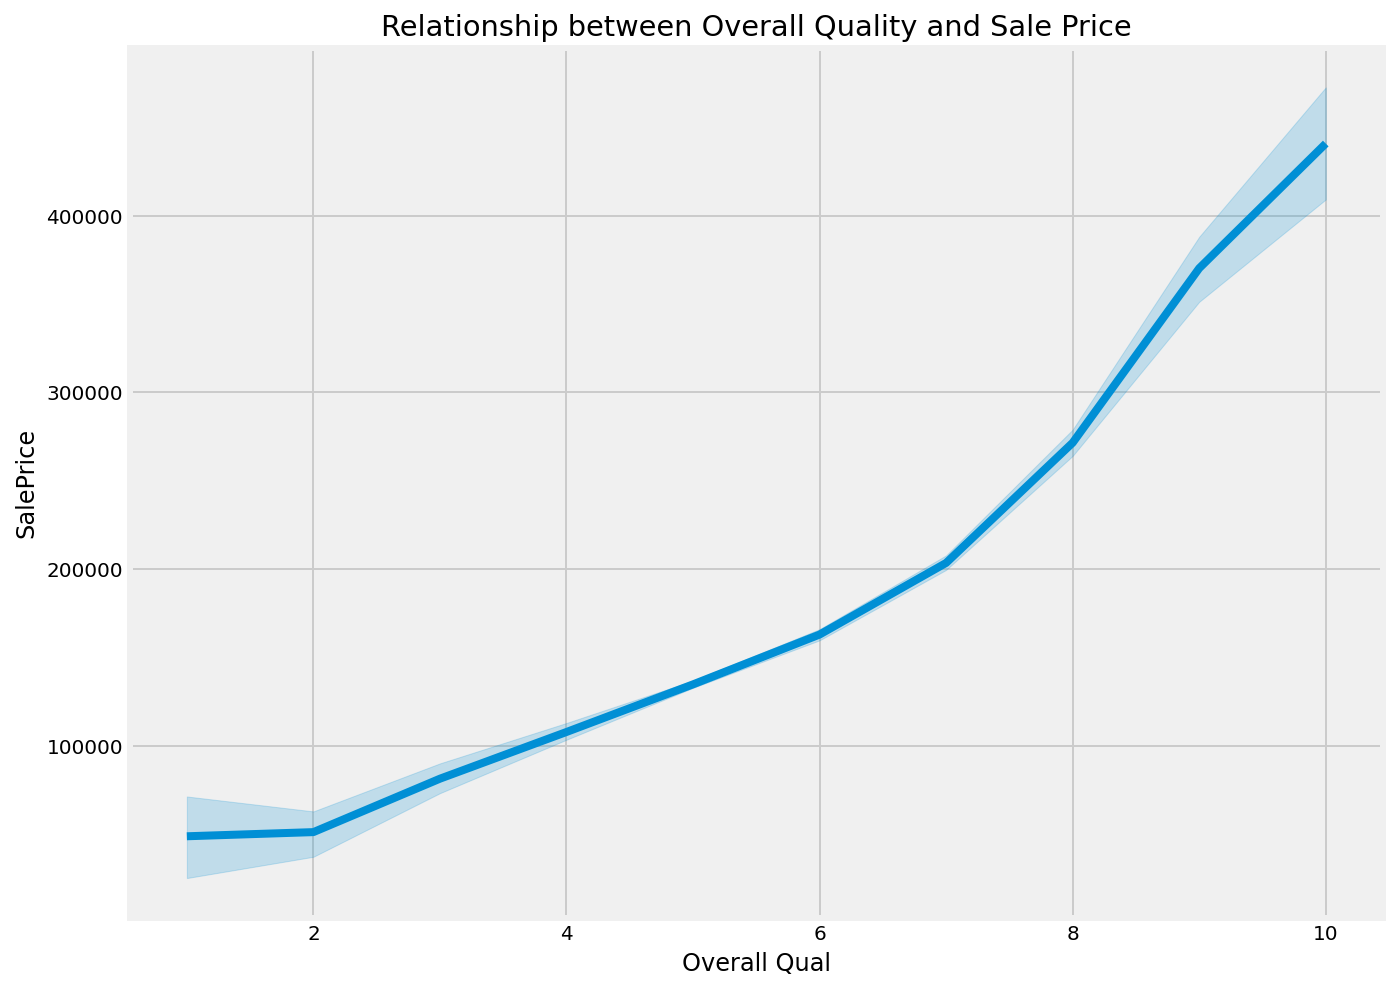

In [20]:
plt.figure(figsize = [10,8])
sns.lineplot(x = 'Overall Qual' , y = 'SalePrice', data = train_set);
plt.title('Relationship between Overall Quality and Sale Price');

**Exterior quality**

Findings :
* Improving the exterior of the property by 1 grade can potentially increase the value of your house by approximately $4685.
* The exterior of your home is the first thing people see on your sale listing. A better quality exterior means a higher chance in getting buyers to click on your listing or attract buyers to view your property.
* As your property attracts more interest, naturally there will be more bids and the seller has a higher bargaining power to push up their property sale price.

Recommendations :
* Repaint the exterior of your home, mow the lawn and be sure grass is not overgrown (especially during summer)
* Change the exterior of your property to a better quality

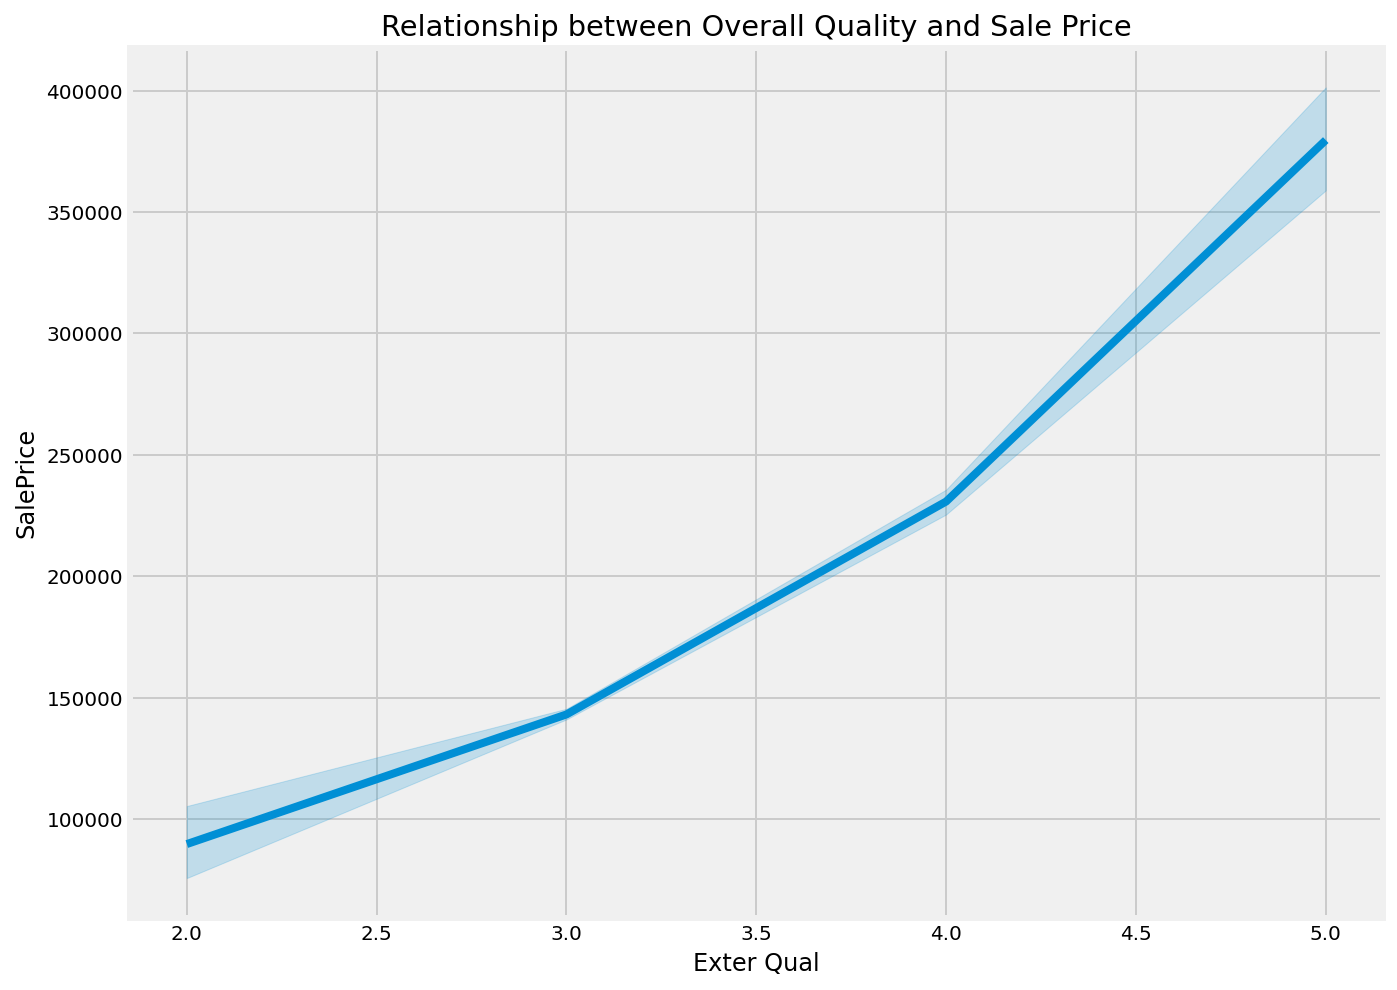

In [21]:
plt.figure(figsize = [10,8])
sns.lineplot(x = 'Exter Qual' , y = 'SalePrice', data = train_set);
plt.title('Relationship between Overall Quality and Sale Price');

**Kitchen Quality**

Findings:
* Improving the exterior of the property by 1 grade can potentially increase the value of your house by approximately $6698
* More than 54% of consumers reported cooking more and baking more in America
* After a complete kitchen remodel, 90% of homeowners reported they wanted to be in their homes more

Recommendations :
* Look at quotes from contractors to remodel kitchen
* Adopt open concept kitchen so you make kitchen look bigger and living area look bigger

Source : https://www.foodnavigator-usa.com/Article/2020/04/15/Survey-Cooking-at-home-will-become-the-new-normal-post-pandemic
https://www.homelight.com/blog/how-much-does-a-kitchen-remodel-increase-home-value/

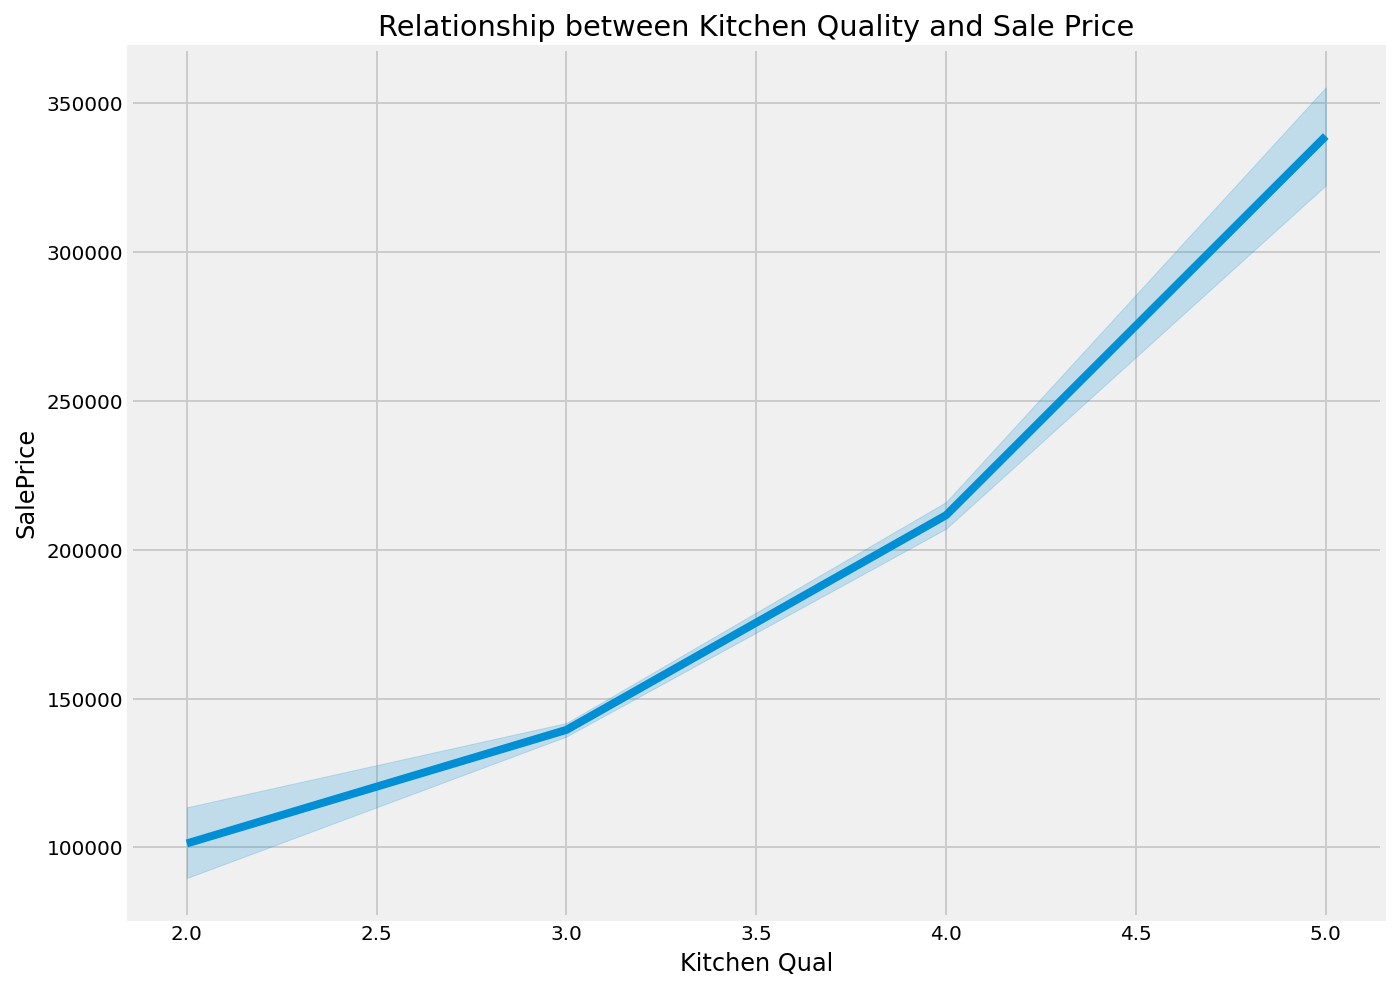

In [22]:
plt.figure(figsize = [10,8])
sns.lineplot(x = 'Kitchen Qual' , y = 'SalePrice', data = train_set);
plt.title('Relationship between Kitchen Quality and Sale Price');

**Total Basement Square Feet**

Findings : 
* From our model, increasing the basement square feet of the property leads to change in your sale price by approximately $28.33 per SF
* Average cost of finishing a basement is lower than addition of an above ground room
* Emergency shelter during hurrican season

Recommendations :
* Finish up your basement if it is unfinish
* If no basement, evaluate the all in cost required and reconsider if it will be too expensive

Source : https://www.homelight.com/blog/how-much-value-does-a-finished-basement-add/

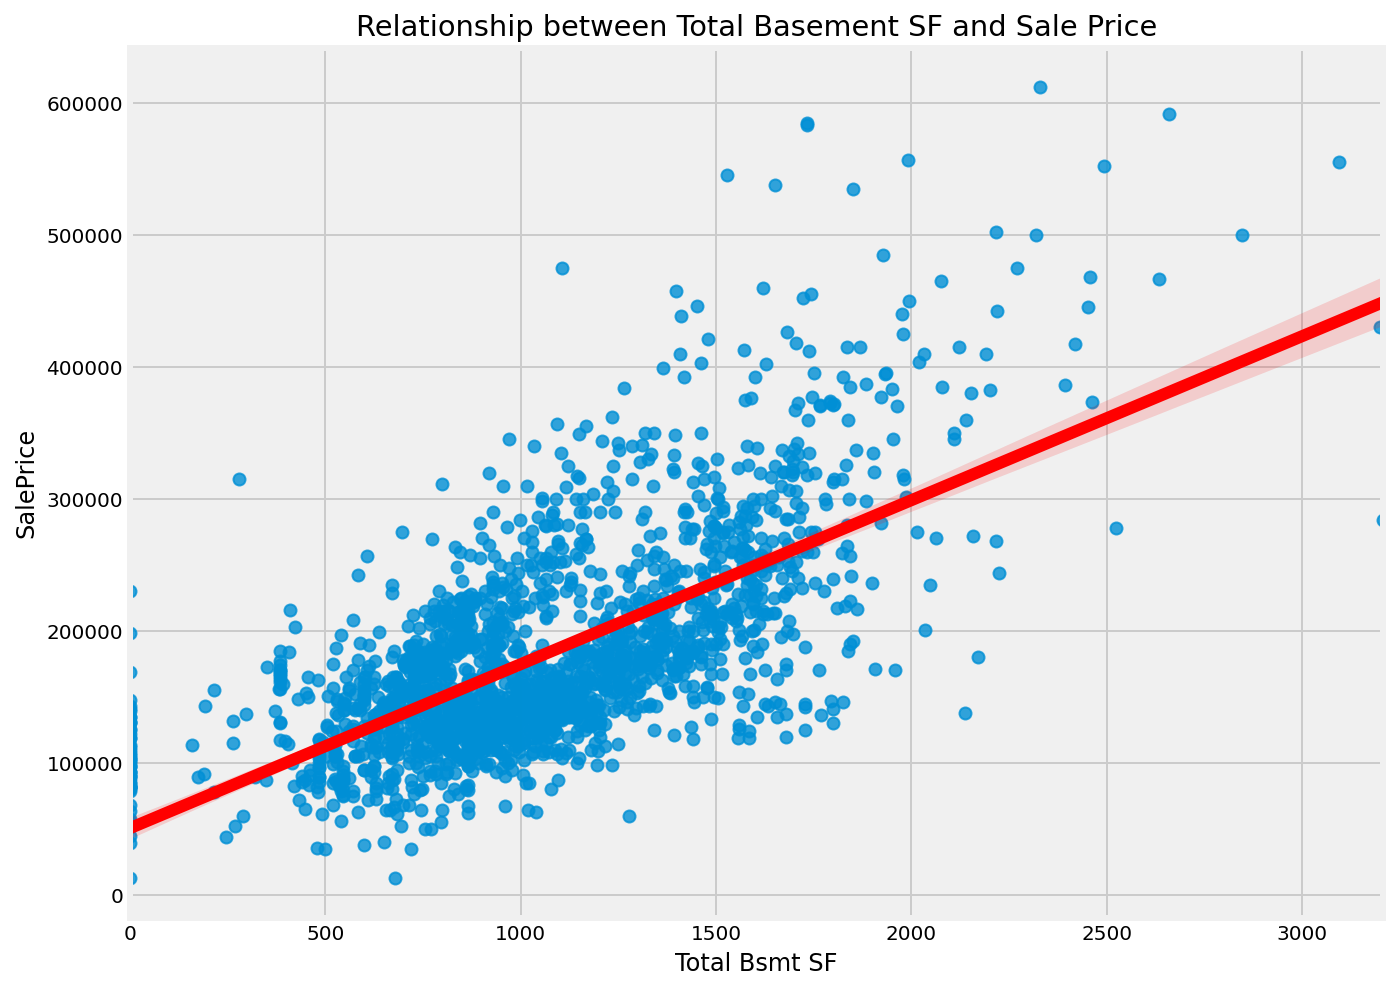

In [23]:
plt.figure(figsize = [10,8])
sns.regplot(x = 'Total Bsmt SF' , y = 'SalePrice', data = train_set, line_kws={'color':'red'});
plt.title('Relationship between Total Basement SF and Sale Price');

**Ground living area**

Findings : 
* From our model, increasing the ground living area potentially increases your real estate value by approximately $49 per SF
* This is the main area homebuyers look at when viewing the property. It is where you, as the seller  are the host to your customer
* What homebuyers are after is living space. For the same neighborhood, the higher the living space, the more valuable the price of the property.

Recommendations :
* Look at your unutilized lot area and consider extension projects to increase your living space
* Consider enclosing your balcony and extend your living space. Open balcony is not considered part of living area
* Adopt open concept design to give homebuyers comfortable space when viewing your property

Source : http://donerighthomeinspection.com/what-we-inspect/index.asp

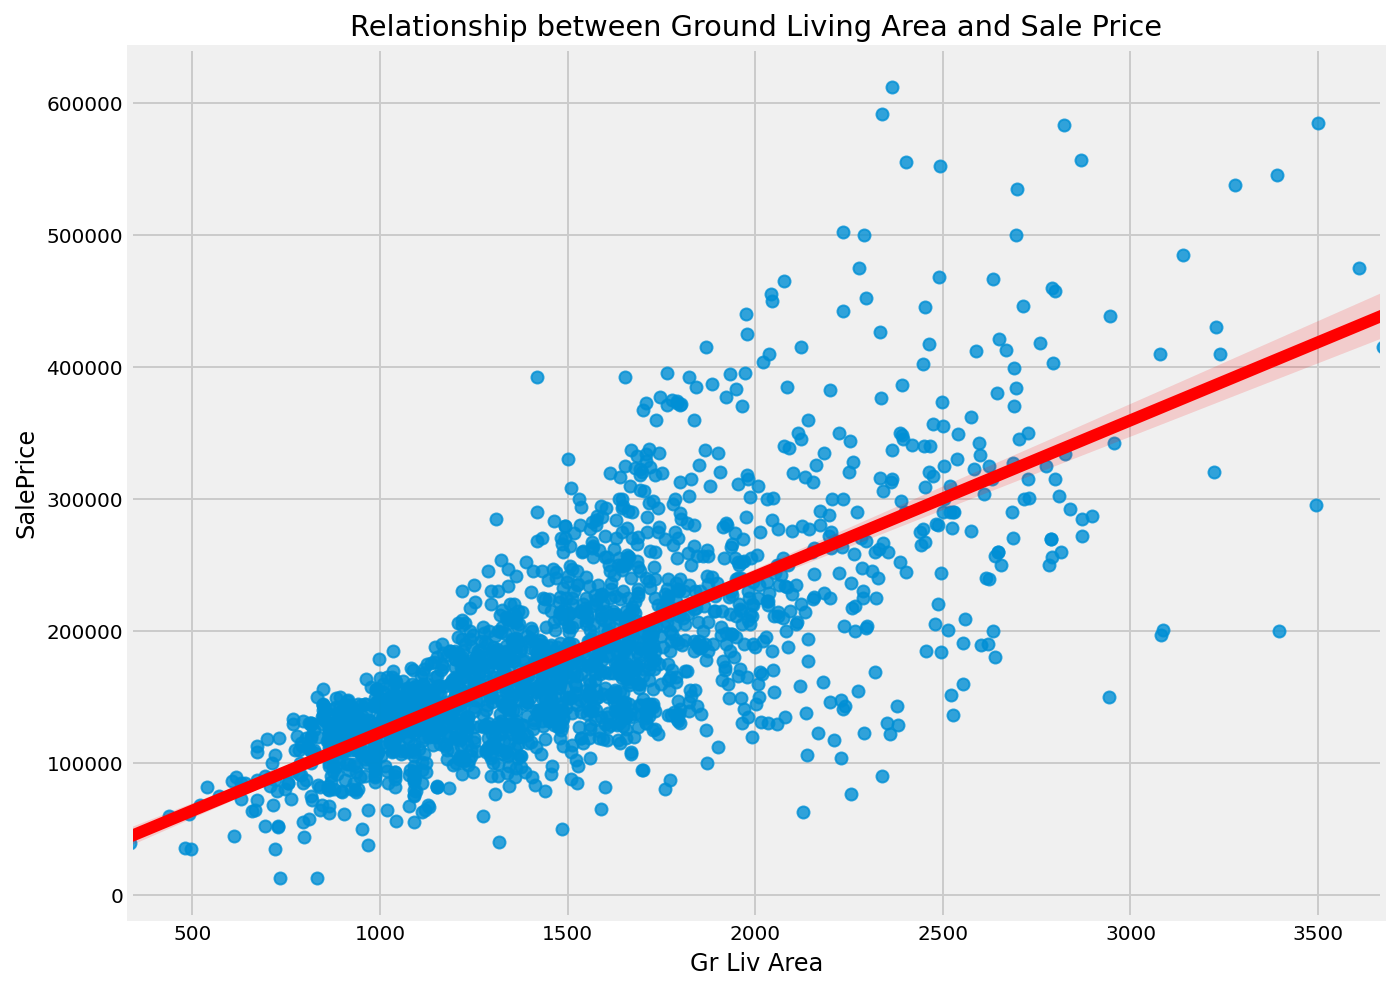

In [24]:
plt.figure(figsize = [10,8])
sns.regplot(x = 'Gr Liv Area' , y = 'SalePrice', data = train_set, line_kws={'color':'red'});
plt.title('Relationship between Ground Living Area and Sale Price');

**Garage Area**

Findings :
* Increasing the garage area SF will potentially increase the value of your real estate by approximately $12.81 per SF
* Des Moines is the city located beside Ame. Cars in Des Moines are at risk of theft. Having a garage protects one's car from getting stolen
* Families in Iowa owns  2 cars on average having more garage space means you will have enough space to secure all your automobile
* Extra storage space and work space

Recommendations :
* Look at your unutilized lot area and consider adding garage or expanding your garage space
* Attached garage is recommended as one does not need to get outdoors to access their car during the winter

Source : https://www.allproservicenter.com/protecting-your-sedan-from-theft-in-des-moines-iowa/
https://datausa.io/profile/geo/iowa#:~:text=The%20average%20car%20ownership%20in%20Iowa%20is%202%20cars%20per%20household.

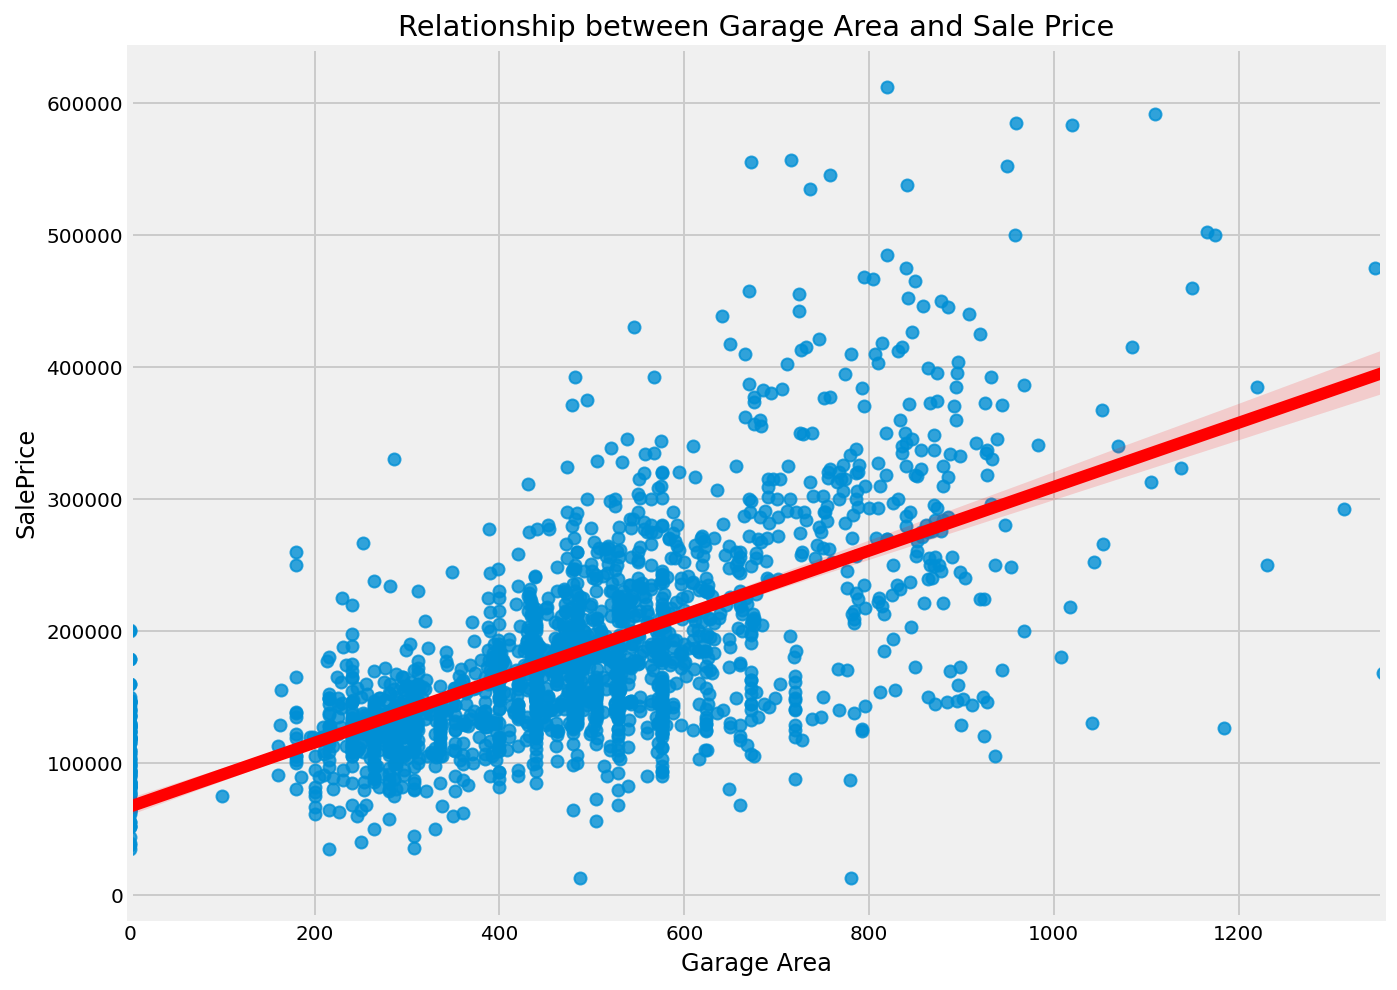

In [25]:
plt.figure(figsize = [10,8])
sns.regplot(x = 'Garage Area' , y = 'SalePrice', data = train_set, line_kws={'color':'red'});
plt.title('Relationship between Garage Area and Sale Price');

## Limitations
This model is just a guide line for one to follow and it does not guarantee success at driving up the value of your real estate.
There are million of factors that come into play.
To name a few, Macro economic factors like COVID 19, resulting in halt in home evictions that results in more than 40 million landlords (home owners) seeking to evict their tenant. This will cause a huge decline in property prices like the case in 2008 when more and more properties are being foreclosed.
There may also be future development in your neighborhoods that result in an exponential increase in home value. You probably dont have to do anything and to increase the value of your property.
Also, this model is just a reference to predict home prices in Ame, Iowa. If you consider the same property features but from San Francisco, the prediction will be way off.
If unsure about your home value, it is still safer to go through an evaluator or multiple evaluators to get accurate estimates.